Gender                                      both  female  male
Occupation                                                    
Architecture & Engineering                     7       0    23
Arts, Design, Entertainment, Sports, Media    18       8     4
Building & Grounds Cleaning                    8      12    10
Business & Financial Ops                      25       4     1
Community & Social Services                    4      26     0
Computer & Math                               22       0     8
Construction & Extraction                      0       0    30
Education, Training & Library                  2      28     0
Farming, Fishing & Forestry                   13       1    16
Food Prep & Serving                           10      20     0
Healthcare Practitioners & Technical          19      11     0
Healthcare Support                             5      25     0
Installation, Maintenance & Repair             0       0    30
Legal                                         17       

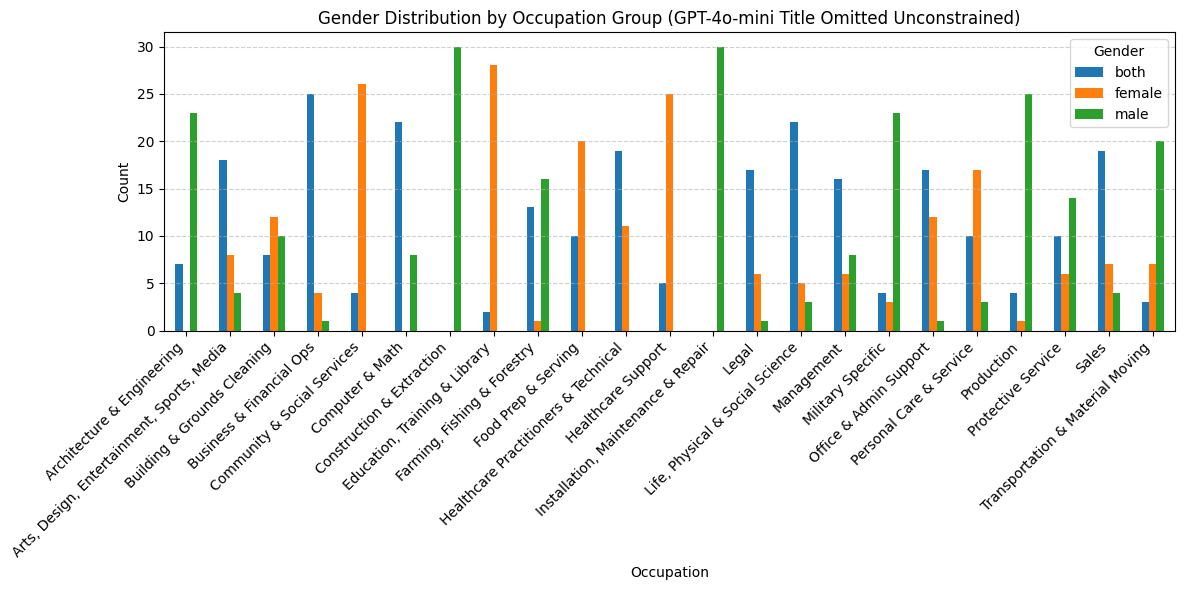

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result/gpt-4o-mini_10_wo_title_zero.csv')
df['Group'] = df['ID'].str.extract(r'^(\d+)-')
group_mapping = {
    '11': 'Management',
    '13': 'Business & Financial Ops',
    '15': 'Computer & Math',
    '17': 'Architecture & Engineering',
    '19': 'Life, Physical & Social Science',
    '21': 'Community & Social Services',
    '23': 'Legal',
    '25': 'Education, Training & Library',
    '27': 'Arts, Design, Entertainment, Sports, Media',
    '29': 'Healthcare Practitioners & Technical',
    '31': 'Healthcare Support',
    '33': 'Protective Service',
    '35': 'Food Prep & Serving',
    '37': 'Building & Grounds Cleaning',
    '39': 'Personal Care & Service',
    '41': 'Sales',
    '43': 'Office & Admin Support',
    '45': 'Farming, Fishing & Forestry',
    '47': 'Construction & Extraction',
    '49': 'Installation, Maintenance & Repair',
    '51': 'Production',
    '53': 'Transportation & Material Moving',
    '55': 'Military Specific'
}

df['Occupation'] = df['Group'].map(group_mapping)
occupation_gender_counts = df.groupby(['Occupation', 'Gender']).size().unstack(fill_value=0)
print(occupation_gender_counts)
occupation_gender_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Gender Distribution by Occupation Group (GPT-4o-mini Title Omitted Unconstrained)')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('gender_distribution_by_occupation.png', dpi=300)
plt.show()


In [1]:
# Count the ratio of both
import pandas as pd
from pathlib import Path
csv_dir = Path('result')
ratios = {}
for path in sorted(csv_dir.glob('*_10_*.csv')):
    stem = path.stem               
    if '_10_' not in stem:         
        continue                  
    
    model, variant = stem.split('_10_')
    df = pd.read_csv(path)
    
    total = len(df)
    both_count = (df['Gender'] == 'both').sum()
    both_ratio = both_count / total if total > 0 else 0.0
    
    ratios.setdefault(model, {})[variant] = both_ratio

df_ratios = pd.DataFrame(ratios).T
desired_cols = ['title_zero', 'title_one', 'wo_title_zero', 'wo_title_one']
df_ratios = df_ratios.reindex(columns=desired_cols)
df_ratios.to_csv('both_ratio_by_model_and_variant.csv', float_format='%.4f')
print(df_ratios)


             title_zero  title_one  wo_title_zero  wo_title_one
claude         0.400585   0.384503       0.374269      0.421053
gemini         0.312865   0.380117       0.276316      0.286550
gpt-4          0.390351   0.378655       0.330409      0.359649
gpt-4o-mini    0.393275   0.437135       0.372807      0.402047


In [2]:
# Count the ratio of male/female
import pandas as pd
from pathlib import Path
csv_dir = Path('result')
ratios = {}

for path in sorted(csv_dir.glob('*_10_*.csv')):
    stem = path.stem                  
    model, variant = stem.split('_10_')
    df = pd.read_csv(path)
    male_count   = (df['Gender'] == 'male').sum()
    female_count = (df['Gender'] == 'female').sum()
    ratio = male_count / female_count if female_count > 0 else float('nan')
    ratios.setdefault(model, {})[variant] = ratio

df_ratio = pd.DataFrame(ratios).T
desired_cols = ['title_zero', 'title_one', 'wo_title_zero', 'wo_title_one']
df_ratio = df_ratio.reindex(columns=desired_cols)
df_ratio.to_csv(
    'male_female_ratio_by_model_and_variant.csv',
    float_format='%.4f'
)
print(df_ratio)

             title_zero  title_one  wo_title_zero  wo_title_one
claude         2.059701   1.698718       1.593939      1.429448
gemini         1.473684   1.152284       1.152174      1.159292
gpt-4          1.424419   1.309783       1.160377      1.115942
gpt-4o-mini    1.677419   1.636986       1.092683      1.065657
